In [1]:
import polars as pl
import numpy as np
from helpers import *

In [2]:
btc_path = '/home/elantonino/Big data project/btc_parquet_data/2024/08/BTCUSDT-1s-2024-08-17.parquet'
eth_path = '/home/elantonino/Big data project/eth_parquet_data/2024/08/ETHUSDT-1s-2024-08-17.parquet'

In [3]:
btc_data = load_parquet(btc_path)
btc_data.collect().head()

Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
datetime[ms],f64,f64,f64,f64,f64,datetime[ms],f64,i64,f64,f64,i64
2024-08-17 00:00:00,58874.59,58874.6,58874.59,58874.6,0.0426,2024-08-17 00:00:00.999,2508.057551,4,0.00166,97.731836,0
2024-08-17 00:00:01,58874.6,58874.6,58874.59,58874.59,0.00311,2024-08-17 00:00:01.999,183.099989,4,0.00141,83.013186,0
2024-08-17 00:00:02,58874.6,58874.6,58874.59,58874.59,0.01868,2024-08-17 00:00:02.999,1099.777477,19,0.0136,800.69456,0
2024-08-17 00:00:03,58874.6,58874.6,58874.59,58874.6,0.00916,2024-08-17 00:00:03.999,539.29129,21,0.00452,266.113192,0
2024-08-17 00:00:04,58874.59,58874.6,58874.59,58874.59,0.03808,2024-08-17 00:00:04.999,2241.944688,11,0.03011,1772.714206,0


In [4]:
eth_data = load_parquet(eth_path)
eth_data.collect().head()

Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
datetime[ms],f64,f64,f64,f64,f64,datetime[ms],f64,i64,f64,f64,i64
2024-08-17 00:00:00,2592.72,2592.72,2592.72,2592.72,0.2801,2024-08-17 00:00:00.999,726.220872,2,0.0,0.0,0
2024-08-17 00:00:01,2592.73,2592.73,2592.72,2592.73,2.6031,2024-08-17 00:00:01.999,6749.109853,7,0.0421,109.153933,0
2024-08-17 00:00:02,2592.73,2592.73,2592.73,2592.73,0.0171,2024-08-17 00:00:02.999,44.335683,3,0.0171,44.335683,0
2024-08-17 00:00:03,2592.72,2592.72,2592.6,2592.61,0.1545,2024-08-17 00:00:03.999,400.569425,26,0.0039,10.111179,0
2024-08-17 00:00:04,2592.61,2592.61,2592.61,2592.61,0.0198,2024-08-17 00:00:04.999,51.333678,1,0.0198,51.333678,0


In [5]:
btc_prices = btc_data[36000:36060].select(standardize(pl.col("Open")))
eth_prices = eth_data[36000:36060].select(standardize(pl.col("Open")))

In [6]:
btc_prices.collect()

Open
f64
-0.189743
-0.190797
-0.189743
-0.190797
-0.189743
…
1.160651
1.351308
1.717873


In [7]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [8]:
from lattice_polars import partition_function, average_path

In [9]:
temperature = 0.1

g = partition_function(btc_prices.collect()['Open'], eth_prices.collect()['Open'], temperature)

In [10]:
g.head

<bound method DataFrame.head of shape: (60, 60)
┌───────┬────────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ col_0 ┆ col_1      ┆ col_2      ┆ col_3      ┆ … ┆ col_56    ┆ col_57    ┆ col_58    ┆ col_59    │
│ ---   ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ f64   ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞═══════╪════════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1.0   ┆ 1.0        ┆ 0.0        ┆ 0.0        ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 1.0   ┆ 8.5125e-7  ┆ 2.8375e-7  ┆ 1.2144e-10 ┆ … ┆ 2.9197e-1 ┆ 5.0956e-1 ┆ 4.6846e-1 ┆ 3.9353e-1 │
│       ┆            ┆            ┆            ┆   ┆ 51        ┆ 56        ┆ 61        ┆ 69        │
│ 0.0   ┆ 2.7650e-7  ┆ 3.9028e-13 ┆ 1.1926e-10 ┆ … ┆ 1.5125e-1 ┆ 2.6320e-1 ┆ 2.4112e-1 ┆ 2.0064e-1 │
│       ┆            ┆            ┆        

In [11]:
avg = average_path(g)
pl.DataFrame().select(avg.alias("avg"))

avg
f64
0.0
0.0
0.0
0.012938
1.991023
…
1.866623
2.497457
1.934487


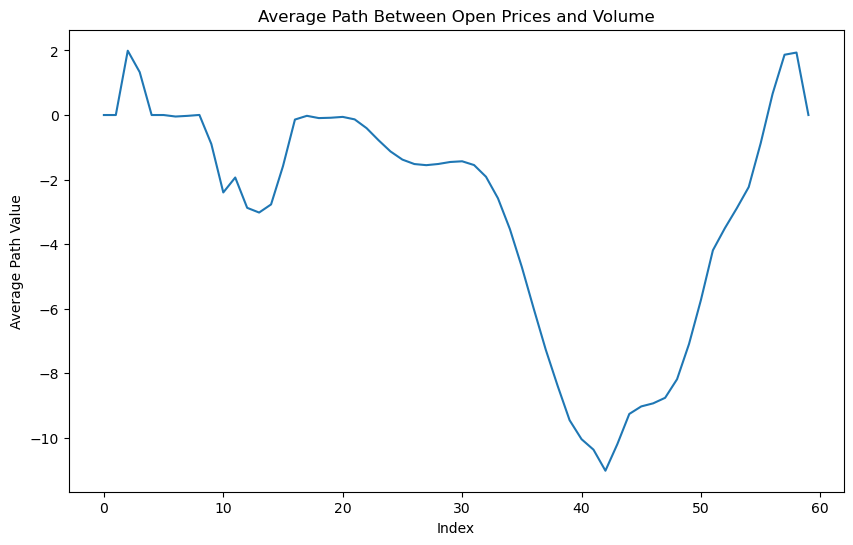

In [12]:
df_avg = pl.DataFrame().select(avg.alias("avg"))  

plot_lead_lag(df_avg)